# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your



Define the problem you are finding answers for from the data given.

<font color=darkblue> 
With the release of new format for SAT in March 2016, as part of the Collage Board who administers the SAT, we would like to study the trend and make recommendations where money is best spent to improve SAT participation rates. </font>




## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import pandas as pd
import csv
from scipy.stats import norm
import scipy.stats as stats

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
# import csv file

sat_2017=pd.read_csv('./datasets/sat_2017.csv')
act_2017=pd.read_csv('./datasets/act_2017.csv')

In [3]:
sat_2017.head(3)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116


In [4]:
act_2017.head(3)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8


#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [5]:
#Code:
print(sat_2017.head(10))
print(act_2017.head(10))

                  State Participation  Evidence-Based Reading and Writing  \
0               Alabama            5%                                 593   
1                Alaska           38%                                 547   
2               Arizona           30%                                 563   
3              Arkansas            3%                                 614   
4            California           53%                                 531   
5              Colorado           11%                                 606   
6           Connecticut          100%                                 530   
7              Delaware          100%                                 503   
8  District of Columbia          100%                                 482   
9               Florida           83%                                 520   

   Math  Total  
0   572   1165  
1   533   1080  
2   553   1116  
3   594   1208  
4   524   1055  
5   595   1201  
6   512   1041  
7   492    996  

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

<font color=darkblue>Verbally Describe Data Answer:

1. Data in sat_2017 shows respective States':
   - participation rate, 
   - average SAT score for Evidence-Based Reading and Writing, Math,
   - and a Total average SAT score
   - SAT score range is 400-1600 for composite SAT score.<br>
   - For subtest in SAT the score range is 200-800 in 10-point increments.<br>
    
    
2. Data in act_2017 shows respective States':
   - participation rate,
   - average ACT score for English, Math, Reading, Science and Composite
   - ACT score range is 1-36 for composite ACT score.<br> 
   - For subtest in ACT the score range is 1-36.<br>


3. Average score for SAT is in integer while average score for ACT is in float.

1. States column in sat_2017 is sorted by alphabetical order while States column in act_2017 is not sorted.There's a "National" in between the states.
2. Data in sat_2017 consist a column that holds total score, whereas data in act_2017 doesn't  </font>

</font> 

#### 4a. Does the data look complete? 

<font color=darkblue> Answer:
    
From the top 10 rows of both data tables, it seems there's no row with missing data.<br>
Further checking using df.info() is performed to see if there's any missing data for both data tables.<br>
Both tables has no null entry.
</font>

In [6]:
# to check on both data tables to see if there's any missing data
sat_2017.info()
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

<font color=darkblue>Answer:

SAT score range is 400-1600 for composite SAT score.<br>
for subtest in SAT the score range is 200-800 in 10-point increments.<br>

ACT score range is 1-36 for composite ACT score.<br>
for subtest in ACT the score range is 1-36.<br>
</font>

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

<font color=darkblue>Answer:<br>
df.describe()is used to check both data tables for any possible data entry error.
</font>

<font color=darkblue> For sat_2017
</font>

In [7]:
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


<font color=darkblue>Answer:
the min score for SAT Math (52) in the data table is below the SAT subject minimum score range (200-800)

</font>

<font color=darkblue>For sat_2017:
a function is run to check which row is having column value out of range 200-800
    </font>

In [8]:
def check_if_data_within_range (df,col,low_range,up_range):
    return df[~df[col].between(low_range,up_range)]     

In [9]:
check_if_data_within_range (sat_2017,'Evidence-Based Reading and Writing',200,800)

,State,Participation,Evidence-Based Reading and Writing,Math,Total


In [10]:
check_if_data_within_range (sat_2017,'Math',200,800)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [11]:
check_if_data_within_range (sat_2017,'Total',400,1600)

,State,Participation,Evidence-Based Reading and Writing,Math,Total


<font color=darkblue>For data table sat_2017
Math score for Maryland is out of range of 200-800.<br>
Counter check on Maryland'maths score in SAT 2017 website<br>
The actual Maryland'maths score in SAT 
2017 website is '524' instead of '52'</font>

In [12]:
# updating the SAT 2017 math score for Maryland
sat_2017.loc[sat_2017['State']=='Maryland',['Math']]=524

In [13]:
# check if updates are done accordingly
sat_2017[sat_2017['State']=='Maryland']

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,524,1060


<font color=darkblue> For act_2017
</font>

In [14]:
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


<font color=darkblue>Answer:
the min score for ACT Science (2.3) in the data table is significantly lower than the score for other 3 subjects.<br>
Find out score 2.3 in Science column belongs to which state in ACT 2017 website   
</font>

In [15]:
# Filter to find out which state has ACT science score 2.3
act_2017.loc[act_2017['Science']==2.3]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


<font color=darkblue>The actual Maryland'Science score in ACT 2017 website is '23.2' instead of '2.3'<br>

</font>

In [16]:
# updating the ACT 2017 science score for Maryland
act_2017.loc[act_2017['State']=='Maryland',['Science']]=23.2

In [17]:
# check if updates are done accordingly
act_2017[act_2017['State']=='Maryland']

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,23.2,23.6


#### 5. What are your data types? 
Display the data types of each feature. 

In [18]:
#Check date type
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [19]:
#Check date type
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

<font color=darkblue>Answer:<br>

for sat_2017:<br>
the State type should be string<br>
the Participation type should be numeric (int/float)<br><br>

for act_2017:<br>
the State type should be string<br>
the Participation type should be numeric (int/float)<br>
the Composite type should be float<br>

</font>

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [20]:
sat_2017['Participation']=sat_2017['Participation'].apply(lambda x:float(x.replace('%','')))

In [21]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [22]:
act_2017['Participation']=act_2017['Participation'].apply(lambda x:float(x.replace('%','')))

In [23]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

- Fix any individual values preventing other columns from being the appropriate type.



In [24]:
# act_2017['Composite']=act_2017['Composite'].apply(lambda x:float(x.replace('%','')))

In [25]:
# the above code throws an error 'could not convert string to float: '20.2x''
#find which data comprises "20.2x"
act_2017[act_2017['Composite'].astype(str).str.contains('20.2x')]

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100.0,19.4,19.8,20.8,20.6,20.2x


<font color=darkblue>row with index number 51, State:Wyoming comprise non-float entry<br>
Counter check on data source to verift the correcr information<br>
The actual Wyoming'Composite score in ACT 2017 website is '20.2' instead of '20.2x'<br> </font>

In [26]:
# Update Wyoming'Composite score in ACT 2017 website as '20.2' 
act_2017.loc[act_2017['State']=='Wyoming',['Composite']]=20.2

In [27]:
# check if updates are done accordingly
act_2017[act_2017['State']=='Wyoming']

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100.0,19.4,19.8,20.8,20.6,20.2


In [28]:
act_2017['Composite']=act_2017['Composite'].apply(lambda x:float(x))

In [29]:
# check act_2017 data type
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [30]:
#check sat_2017 datatype
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [31]:
#check act_2017 datatype
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [32]:
# Rename sat_2017 column name 
sat_2017=sat_2017.rename(columns={'State':'state','Participation':'sat_17_part_pct','Evidence-Based Reading and Writing':'sat_17_ebrw','Math':'sat_17_math','Total':'sat_17_total'})

In [33]:
sat_2017.head(2)

,state,sat_17_part_pct,sat_17_ebrw,sat_17_math,sat_17_total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080


In [34]:
# Rename act_2017 column name 
act_2017=act_2017.rename(columns={'State':'state','Participation':'act_17_part_pct','English':'act_17_english','Math':'act_17_math','Reading':'act_17_reading','Science':'act_17_science','Composite':'act_17_composite'})

In [35]:
act_2017.head(2)

,state,act_17_part_pct,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT & ACT|Participating States for SAT,ACT year 2017 & 2018| 
|sat_17_participation|int|SAT|Participating rates for SAT year 2017|
|sat_17_ebrw|float|SAT|Evidence-Based Reading and Writing score for SAT year 2017|
|sat_17_math|float/|SAT|Math score for SAT year 2017|
|sat_17_total|float|SAT|Total score for SAT year 2017|
|act_17_participation|float|ACT|Participating rates for ACT year 2017|
|act_17_english|float|ACT|English score for ACT year 2017|
|act_17_math|float|ACT|Math score for ACT year 2017|
|act_17_reading|float|ACT|Reading score for ACT year 2017|
|act_17_science|float|ACT|Science score for ACT year 2017|
|act_17_composite|object|ACT|Composite score for ACT year 2017|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [36]:
# act_2017 has an additional row wit state 'National'
act_2017.head(3)

,state,act_17_part_pct,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8


In [37]:
# drop State= National row
act_2017.drop(0,axis=0,inplace=True)

In [38]:
act_2017.head(3)

,state,act_17_part_pct,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [39]:
#Code:
combined_17=pd.merge(sat_2017,act_2017,left_on='state',right_on='state',how='outer')

In [40]:
combined_17.head(3)

,state,sat_17_part_pct,sat_17_ebrw,sat_17_math,sat_17_total,act_17_part_pct,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7


In [41]:
combined_17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 11 columns):
state               51 non-null object
sat_17_part_pct     51 non-null float64
sat_17_ebrw         51 non-null int64
sat_17_math         51 non-null int64
sat_17_total        51 non-null int64
act_17_part_pct     51 non-null float64
act_17_english      51 non-null float64
act_17_math         51 non-null float64
act_17_reading      51 non-null float64
act_17_science      51 non-null float64
act_17_composite    51 non-null float64
dtypes: float64(7), int64(3), object(1)
memory usage: 4.8+ KB


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [42]:
combined_17.dtypes

state                object
sat_17_part_pct     float64
sat_17_ebrw           int64
sat_17_math           int64
sat_17_total          int64
act_17_part_pct     float64
act_17_english      float64
act_17_math         float64
act_17_reading      float64
act_17_science      float64
act_17_composite    float64
dtype: object

In [43]:
#code
# export file to csv
combined_17.to_csv('./datasets/combined_17.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [44]:
# Import af read csv file for act & sat 2018

sat_2018=pd.read_csv('./datasets/sat_2018.csv')
act_2018=pd.read_csv('./datasets/act_20182.csv')

In [45]:
sat_2018.head(2)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106


In [46]:
act_2018.head(2)

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7


<font color=darkblue> Check value range in data table.describe()<br>Check if there is possible error in data ie.values in respective columns are not within the minimum possible and maximum possible range.<br> 
</font> 

In [47]:
sat_2018.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [48]:
check_if_data_within_range (sat_2018,'Evidence-Based Reading and Writing',200,800)

,State,Participation,Evidence-Based Reading and Writing,Math,Total


In [49]:
check_if_data_within_range (sat_2018,'Math',200,800)

,State,Participation,Evidence-Based Reading and Writing,Math,Total


In [50]:
check_if_data_within_range (sat_2018,'Total',400,1600)

,State,Participation,Evidence-Based Reading and Writing,Math,Total


In [51]:
act_2018.describe()

,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
count,53.000000,53.000000,53.000000,53.000000,53.000000
mean,21.460377,20.958491,21.101887,21.988679,21.320755
std,2.069591,2.403638,1.999855,2.129614,1.837992
min,17.700000,16.600000,17.800000,18.000000,17.900000
25%,20.000000,19.100000,19.400000,20.500000,20.000000
50%,20.800000,20.200000,20.600000,21.300000,20.800000
75%,23.500000,23.700000,23.100000,24.000000,23.000000
max,25.600000,26.000000,25.200000,26.100000,24.900000


In [52]:
check_if_data_within_range (act_2018,'Average Composite Score',1,36)

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score


In [53]:
check_if_data_within_range (act_2018,'Average English Score',1,36)

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score


In [54]:
check_if_data_within_range (act_2018,'Average Math Score',1,36)

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score


In [55]:
check_if_data_within_range (act_2018,'Average Reading Score',1,36)

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score


In [56]:
check_if_data_within_range (act_2018,'Average Science Score',1,36)

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score


<font color=darkblue>All data in sat_2018 & act_2018 is within the minimum possible and maximum possible range
    </font>

In [57]:
#  check on data table data type and check if there's any null value data
sat_2018.info()
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
State                            53 non-null object
Percentage of Students Tested    53 non-null object
Average Composite Score          53 non-null float64
Average English Score            53 non-null float64
Average Math Score               53 non-null float64
Average Reading Score            53 non-null float64
Average Science Score            53 non-null float64
dtypes: float64(5), object(2)
memory usage: 3.0+ KB


In [58]:
#Change sat_2018 'Participation' & act_2018'Percentage of Students Tested' data type from object to numerical
sat_2018['Participation']=sat_2018['Participation'].apply(lambda x:float(x.replace('%','')))

In [59]:
sat_2018.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [60]:
# act_2018['Percentage of Students Tested']=act_2018['Percentage of Students Tested'].apply(lambda x:float(x.replace('%','')))

<font color=darkblue> Was unable to convert act_18's Percentage of Students Tested to numeric<br>
The above code checked on csv file and found some of the valued are displayed as "Not given"<br>
counter check on those value in other website to verify<br>

</font>

In [61]:
act_2018[act_2018['Percentage of Students Tested']=='Not given']

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
18,Louisiana,Not given,19.2,19.0,18.5,19.6,19.1
27,National,Not given,20.8,20.2,20.5,21.3,20.7
34,North Carolina,Not given,19.1,18.0,19.3,19.5,19.2
37,Oklahoma,Not given,19.3,18.4,18.8,20.1,19.4
39,Pennsylvania,Not given,23.5,23.3,23.2,24.0,23.1
52,National,Not given,20.8,20.2,20.5,21.3,20.7


<font color=darkblue>Info below shows the Percentage of Students Tested for the 6 States <br>
Louisiana= 100<br>
North Carolina=100<br>
Oklahoma= 100<br>
Pennsylvania=20<br>
National=55<br>

from source:<br>
https://www.act.org/content/dam/act/unsecured/documents/cccr2018/National-CCCR-2018.pdf
</font>

In [62]:
#updating the 6 rows of data with updated value
act_2018.loc[act_2018['State']=='Louisiana','Percentage of Students Tested']=100
act_2018.loc[act_2018['State']=='North Carolina','Percentage of Students Tested']=100
act_2018.loc[act_2018['State']=='Oklahoma','Percentage of Students Tested']=100
act_2018.loc[act_2018['State']=='Pennsylvania','Percentage of Students Tested']=20
act_2018.loc[act_2018['State']=='National']=55

In [63]:
# Check on updated values
act_2018[act_2018['State'].isin(['Louisiana','North Carolina','Oklahoma','Pennsylvania','National'])]

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
18,Louisiana,100,19.2,19.0,18.5,19.6,19.1
34,North Carolina,100,19.1,18.0,19.3,19.5,19.2
37,Oklahoma,100,19.3,18.4,18.8,20.1,19.4
39,Pennsylvania,20,23.5,23.3,23.2,24.0,23.1


In [64]:
act_2018[['State','Percentage of Students Tested']].head(35)

,State,Percentage of Students Tested
0,Alabama,100
1,Alaska,33
2,Arizona,66
3,Arkansas,100
4,California,27
5,Colorado,30
6,Connecticut,26
7,Delaware,17
8,District of Columbia,32
9,Florida,66


In [65]:
# check type for act_2018["Percentage of Students Tested"]
act_2018["Percentage of Students Tested"].dtypes

dtype('O')

In [66]:
# change data type for act_2018 percentage of student tested to float.
act_2018['Percentage of Students Tested']=act_2018['Percentage of Students Tested'].apply(lambda x:float(x))

In [67]:
# check dtype
act_2018["Percentage of Students Tested"].dtypes

dtype('float64')

In [68]:
# Check on both 2018 data frame for data types.
sat_2018.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [69]:
act_2018.dtypes

State                             object
Percentage of Students Tested    float64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

In [70]:
# Rename columns with suitable name.
sat_2018=sat_2018.rename(columns={'State':'state','Participation':'sat_18_part_pct','Evidence-Based Reading and Writing':'sat_18_ebrw','Math':'sat_18_math','Total':'sat_18_total'})

In [71]:
sat_2018.head(2)

,state,sat_18_part_pct,sat_18_ebrw,sat_18_math,sat_18_total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106


In [72]:
# Rename columns with suitable name.
act_2018=act_2018.rename(columns={'State':'state','Percentage of Students Tested':'act_18_part_pct','Average English Score':'act_18_english','Average Math Score':'act_18_math','Average Reading Score':'act_18_reading','Average Science Score':'act_18_science','Average Composite Score':'act_18_composite'})

In [73]:
act_2018.head(2)

,state,act_18_part_pct,act_18_composite,act_18_english,act_18_math,act_18_reading,act_18_science
0,Alabama,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,33.0,20.8,19.8,20.6,21.6,20.7


<font color=darkblue>Create Data Dictionary.
</font>

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT & ACT|Participating States for SAT & ACT year 2017 & 2018| 
|sat_18_participation|int|SAT|Participating rates for SAT year 2018|
|sat_18_ebrw|float|SAT|Evidence-Based Reading and Writing score for SAT year 2018|
|sat_18_math|float/|SAT|Math score for SAT year 2018|
|sat_18_total|float|SAT|Total score for SAT year 2018|
|act_18_state|object|ACT|Participating States for ACT year 2018|
|act_18_participation|float|ACT|Participating rates for ACT year 2018|
|act_18_english|float|ACT|Math score  for ACT year 2018|
|act_18_math|float|ACT|Math score for ACT year 2018|
|act_18_reading|float|ACT|Reading score for ACT year 2018|
|act_18_science|float|ACT|Science score for ACT year 2018|
|act_18_composite|object|ACT|Composite score for ACT year 2018|
|sat_17_participation|int|SAT|Participating rates for SAT year 2017|
|sat_17_ebrw|float|SAT|Evidence-Based Reading and Writing score for SAT year 2017|
|sat_17_math|float/|SAT|Math score for SAT year 2017|
|sat_17_total|float|SAT|Total score for SAT year 2017|
|act_17_participation|float|ACT|Participating rates for ACT year 2017|
|act_17_english|float|ACT|English score for ACT year 2017|
|act_17_math|float|ACT|Math score for ACT year 2017|
|act_17_reading|float|ACT|Reading score for ACT year 2017|
|act_17_science|float|ACT|Science score for ACT year 2017|
|act_17_composite|object|ACT|Composite score for ACT year 2017|

<font color=darkblue> For respective data table, drop unnecessary rows.<br>
    sat_2018 has 51 rows of data while act_2018 has 53 rows of data<br>
    Upon checking there are 2 lines of State National found in act_2018<br>
    The 2 State National line will be removed.
</font>

In [74]:
act_2018.loc[act_2018['state']=='National']

,state,act_18_part_pct,act_18_composite,act_18_english,act_18_math,act_18_reading,act_18_science


In [75]:
act_2018.drop([27,52],axis=0,inplace=True)

In [76]:
act_2018.iloc[26:53,:]

,state,act_18_part_pct,act_18_composite,act_18_english,act_18_math,act_18_reading,act_18_science
26,Montana,100.0,20.0,18.7,19.9,20.7,20.0
28,Nebraska,100.0,20.1,19.4,19.8,20.4,20.1
29,Nevada,100.0,17.7,16.6,17.8,18.0,17.9
30,New Hampshire,16.0,25.1,25.1,24.7,25.6,24.4
31,New Jersey,31.0,23.7,23.8,23.6,24.0,23.0
32,New Mexico,67.0,19.4,18.3,19.1,20.1,19.7
33,New York,27.0,24.5,24.2,24.2,24.9,24.2
34,North Carolina,100.0,19.1,18.0,19.3,19.5,19.2
35,North Dakota,98.0,20.3,19.1,20.3,20.7,20.5
36,Ohio,100.0,20.3,19.3,20.3,20.8,20.4


In [77]:
#Join the 2018 ACT and SAT dataframes.
combined_18=pd.merge(sat_2018,act_2018,left_on='state',right_on='state',how='outer')

In [78]:
combined_18.head(3)

,state,sat_18_part_pct,sat_18_ebrw,sat_18_math,sat_18_total,act_18_part_pct,act_18_composite,act_18_english,act_18_math,act_18_reading,act_18_science
0,Alabama,6.0,595,571,1166,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,43.0,562,544,1106,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,29.0,577,572,1149,66.0,19.2,18.2,19.4,19.5,19.2


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [79]:
# combine 2017_2018 df

final=pd.merge(combined_17,combined_18,left_on='state',right_on='state',how='outer')

In [80]:
final.head(2)

,state,sat_17_part_pct,sat_17_ebrw,sat_17_math,sat_17_total,act_17_part_pct,act_17_english,act_17_math,act_17_reading,act_17_science,...,sat_18_part_pct,sat_18_ebrw,sat_18_math,sat_18_total,act_18_part_pct,act_18_composite,act_18_english,act_18_math,act_18_reading,act_18_science
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,...,6.0,595,571,1166,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,...,43.0,562,544,1106,33.0,20.8,19.8,20.6,21.6,20.7


In [81]:
# to check if ther's any null value
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 21 columns):
state               51 non-null object
sat_17_part_pct     51 non-null float64
sat_17_ebrw         51 non-null int64
sat_17_math         51 non-null int64
sat_17_total        51 non-null int64
act_17_part_pct     51 non-null float64
act_17_english      51 non-null float64
act_17_math         51 non-null float64
act_17_reading      51 non-null float64
act_17_science      51 non-null float64
act_17_composite    51 non-null float64
sat_18_part_pct     51 non-null float64
sat_18_ebrw         51 non-null int64
sat_18_math         51 non-null int64
sat_18_total        51 non-null int64
act_18_part_pct     51 non-null float64
act_18_composite    51 non-null float64
act_18_english      51 non-null float64
act_18_math         51 non-null float64
act_18_reading      51 non-null float64
act_18_science      51 non-null float64
dtypes: float64(14), int64(6), object(1)
memory usage: 8.8+ KB


In [82]:
# export file to csv
final.to_csv('./datasets/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [83]:
final.describe()

,sat_17_part_pct,sat_17_ebrw,sat_17_math,sat_17_total,act_17_part_pct,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_part_pct,sat_18_ebrw,sat_18_math,sat_18_total,act_18_part_pct,act_18_composite,act_18_english,act_18_math,act_18_reading,act_18_science
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,45.745098,563.686275,556.235294,1120.019608,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,37.314256,47.502627,47.772623,94.155083,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,480.000000,480.000000,977.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.500000,534.500000,522.500000,1057.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,52.000000,552.000000,544.000000,1098.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,77.500000,610.500000,593.500000,1204.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


In [84]:
#Code:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_17_part_pct,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_17_ebrw,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_17_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_17_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_17_part_pct,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_17_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_17_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_17_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_17_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_17_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [85]:
#create function

def std_manual(list_values):
    
    m=sum(list_values)/len(list_values)
    total_sum=[]
    length=len(list_values)
    
    for i in list_values:
        total_sum.append((i-m)**2)
    return (sum(total_sum)/length)**0.5      

    

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [86]:
# dictionary comprehension, skip first column 'state'
# {col: round(std_dev,6) for col in final.columns[1:]}

In [87]:
# for i in final.columns:
#     for col in [final[i]]:
#         if (final[i].dtypes=='float64')or (final[i].dtypes=='int64'):
#             print(col.name,std_manual(col))      
            

In [88]:
# Dictionary Comprehension
{col.name:std_manual(col) for col in [final[i] for i in final.columns if (final[i].dtype=='float64') or (final[i].dtype=='int64')]}

{'sat_17_part_pct': 34.92907076664508,
 'sat_17_ebrw': 45.21697020437866,
 'sat_17_math': 46.65713364485503,
 'sat_17_total': 91.58351056778743,
 'act_17_part_pct': 31.824175751231806,
 'act_17_english': 2.3304876369363363,
 'act_17_math': 1.9624620273436781,
 'act_17_reading': 2.0469029314842646,
 'act_17_science': 1.7222161451443676,
 'act_17_composite': 2.000786081581989,
 'sat_18_part_pct': 36.946619223539415,
 'sat_18_ebrw': 47.03460978357609,
 'sat_18_math': 47.30194550378352,
 'sat_18_total': 93.22742384464433,
 'act_18_part_pct': 33.745194881997506,
 'act_18_composite': 2.0855261815801147,
 'act_18_english': 2.4222536143202795,
 'act_18_math': 2.015707255555717,
 'act_18_reading': 2.145891884510421,
 'act_18_science': 1.8516885484833543}

In [89]:
sat_17_ebrw_array= np.array(final['sat_17_ebrw'])
sat_17_ebrw_array


array([593, 547, 563, 614, 531, 606, 530, 503, 482, 520, 535, 544, 513,
       559, 542, 641, 632, 631, 611, 513, 536, 555, 509, 644, 634, 640,
       605, 629, 563, 532, 530, 577, 528, 546, 635, 578, 530, 560, 540,
       539, 543, 612, 623, 513, 624, 562, 561, 541, 558, 642, 626],
      dtype=int64)

In [90]:
# numpy's std
sat_17_ebrw_array_npstd=np.std(sat_17_ebrw_array)
sat_17_ebrw_array_npstd

45.21697020437866

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer
<font color=darkblue>The manually calculated std is same as numpy's std method but differs from pandas decribe output.<br>
    ie<br>
    for sat_17_ebrw : <br>
    manual calculated std=45.21697<br>
    np std= 45.21697020437866<br>
    pandas describe=45.666901<br><br>
    As there many ways in calculating std.    
    There is different with numpy.std by default parameter ddof (Delta Degrees of Freedom):<br>
    pandas by default ddof=1<br>
    numpy by default ddof=0<br>
    </font>

<font color=darkblue>
Means Delta Degrees of Freedom. The divisor used in calculations is N - ddof, where N represents the number of elements. By default ddof is zero for np.std.<br>
In some cases (e.g. working with population level data) the denominator is N. In other cases (e.g. sample level data) the denominator is N-1.<br>
In numpy, the default is ddof = 0 (divide by N)</font>

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [91]:
# sat 2017 lowest part_pct
final[['state','sat_17_part_pct']].sort_values('sat_17_part_pct',ascending=True).head()

,state,sat_17_part_pct
34,North Dakota,2.0
24,Mississippi,2.0
15,Iowa,2.0
25,Missouri,3.0
44,Utah,3.0


<font color=darkblue>
Lowest participation rates 2017 SAT are North Dakota (2%), Mississippi(2%), Iowa(2%)</font>

In [92]:
# sat 2017 highest part_pct
final[['state','sat_17_part_pct']].sort_values('sat_17_part_pct',ascending=False).head()

,state,sat_17_part_pct
8,District of Columbia,100.0
22,Michigan,100.0
6,Connecticut,100.0
7,Delaware,100.0
29,New Hampshire,96.0


<font color=darkblue>Highest participation rates 2017 SAT are District of Columbia (100%), Michigan(100%), Connecticut(100%) and Delaware(100%) </font>

In [93]:
# sat 2018 lowest part_pct
final[['state','sat_18_part_pct']].sort_values('sat_18_part_pct',ascending=True).head()

,state,sat_18_part_pct
34,North Dakota,2.0
50,Wyoming,3.0
41,South Dakota,3.0
27,Nebraska,3.0
49,Wisconsin,3.0


<font color=darkblue>
Lowest participation rates 2018 SAT is North Dakota (2%)

In [94]:
# sat 2018 highest part_pct
final[['state','sat_18_part_pct']].sort_values('sat_18_part_pct',ascending=False).head(6)

,state,sat_18_part_pct
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,100.0
22,Michigan,100.0
12,Idaho,100.0
19,Maine,99.0


<font color=darkblue>Highest participation rates 2018 SAT are Colorado (100%), Connecticut (100%),Delaware (100%),Michigan (100%) and Idaho (100%)</font>

In [95]:
# act 2017 lowest part_pct
final[['state','act_17_part_pct']].sort_values('act_17_part_pct',ascending=True).head()

,state,act_17_part_pct
19,Maine,8.0
29,New Hampshire,18.0
7,Delaware,18.0
39,Rhode Island,21.0
38,Pennsylvania,23.0


<font color=darkblue>Lowest participation rates 2017 ACT is Maine (8%)</font>

In [96]:
# act 2017 highest part_pct
final[['state','act_17_part_pct']].sort_values('act_17_part_pct',ascending=False).head(19)

,state,act_17_part_pct
0,Alabama,100.0
17,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0
40,South Carolina,100.0
36,Oklahoma,100.0
33,North Carolina,100.0
28,Nevada,100.0
26,Montana,100.0


<font color=darkblue> Highest participation rates 2017 ACT are Alabama,Kentucky,Wisconsin,Utah,Tennessee,South Carolina,Oklahoma,North Carolina,Nevada,Montana,Mississippi,Minnesota,Louisiana,Missouri,Wyoming,Colorado and Arkansas with the rate of 100%</font>

In [97]:
# act 2017 lowest part_pct
final[['state','act_18_part_pct']].sort_values('act_18_part_pct',ascending=True).head()

,state,act_18_part_pct
19,Maine,7.0
39,Rhode Island,15.0
29,New Hampshire,16.0
7,Delaware,17.0
38,Pennsylvania,20.0


<font color=darkblue> Lowest participation rates 2018 ACT is Maine (7%)</font>

In [98]:
# act 2018 highest part_pct
final[['state','act_18_part_pct']].sort_values('act_18_part_pct',ascending=False).head(19)

,state,act_18_part_pct
0,Alabama,100.0
17,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0
40,South Carolina,100.0
36,Oklahoma,100.0
35,Ohio,100.0
33,North Carolina,100.0
28,Nevada,100.0


<font color=darkblue> Highest participation rates 2018 ACT are Alabama,Kentucky,Wisconsin,Utah,Tennessee,South Carolina,Oklahoma,Ohio	,North Carolina,Nevada,Nebraska,Montana,Mississippi,Louisiana,Missouri,Wyoming and Arkansas with the rate of 100% </font>


In [99]:
composite_total=final[['state','sat_17_total']].sort_values('sat_17_total',ascending=True).head()
composite_total

,state,sat_17_total
8,District of Columbia,950
7,Delaware,996
12,Idaho,1005
22,Michigan,1005
19,Maine,1012


<font color=darkblue>States have the lowest mean total/composite scores for 2017 SAT is District of Columbia (950 </font>

In [100]:
composite_total=final[['state','sat_17_total']].sort_values('sat_17_total',ascending=False).head()
composite_total

,state,sat_17_total
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260


<font color=darkblue>
States have the highest  mean total/composite scores for 2017 SAT is Minnesota (1295)</font>

In [101]:
composite_total=final[['state','sat_18_total']].sort_values('sat_18_total',ascending=True).head()
composite_total

,state,sat_18_total
8,District of Columbia,977
7,Delaware,998
48,West Virginia,999
12,Idaho,1001
44,Utah,1010


<font color=darkblue>States have the lowest  mean total/composite scores for 2018 SAT is District of Columbia (977)</font>

In [102]:
composite_total=final[['state','sat_18_total']].sort_values('sat_18_total',ascending=False).head()
composite_total

,state,sat_18_total
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
15,Iowa,1265
16,Kansas,1265


<font color=darkblue>States have the highest  mean total/composite scores for 2018 SAT is Minnesota (1298)</font>

In [103]:
composite_total=final[['state','act_17_composite']].sort_values('act_17_composite',ascending=True).head()
composite_total

,state,act_17_composite
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1


<font color=darkblue> States have the lowest  mean total/composite scores for 2017 ACT is Nevada (17.8)</font>

In [104]:
composite_total=final[['state','act_17_composite']].sort_values('act_17_composite',ascending=False).head()
composite_total

,state,act_17_composite
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


<font color=darkblue> States have the highest  mean total/composite scores for 2017 ACT is New Hampshire (25.5)</font>

In [105]:
composite_total=final[['state','act_18_composite']].sort_values('act_18_composite',ascending=True).head()
composite_total

,state,act_18_composite
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1


<font color=darkblue>States have the lowest  mean total/composite scores for2018 ACT is Nevada (17.7)</font>

In [106]:
composite_total=final[['state','act_18_composite']].sort_values('act_18_composite',ascending=False).head()
composite_total

,state,act_18_composite
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4


<font color=darkblue>States have the highest  mean total/composite scores for2018 ACT is Connecticut (25.6)</font>

Do any states with 100% participation on a given test have a rate change year-to-year?</font>

In [107]:
# participation_sat=final[['state','sat_17_part_pct','sat_18_part_pct','act_17_part_pct','act_18_part_pct']]

In [108]:
# create participation_sat
participation_sat=final[['state','sat_17_part_pct','sat_18_part_pct']]

In [109]:
participation_sat[participation_sat[['state','sat_17_part_pct','sat_18_part_pct']].values==100.0].sort_values('sat_17_part_pct',ascending=False).duplicated(keep=False)

6      True
6      True
7      True
7      True
8     False
22     True
22     True
12    False
5     False
dtype: bool

In [110]:
# filter sat participation rate ==100 and sort by sat_17 value descending order
participation_sat[participation_sat[['state','sat_17_part_pct','sat_18_part_pct']].values==100.0].sort_values('sat_17_part_pct',ascending=False)

,state,sat_17_part_pct,sat_18_part_pct
6,Connecticut,100.0,100.0
6,Connecticut,100.0,100.0
7,Delaware,100.0,100.0
7,Delaware,100.0,100.0
8,District of Columbia,100.0,92.0
22,Michigan,100.0,100.0
22,Michigan,100.0,100.0
12,Idaho,93.0,100.0
5,Colorado,11.0,100.0


In [111]:
# participation_sat.loc[participation_sat['sat_17_part_pct']==100,['state','sat_17_part_pct','sat_18_part_pct']]

In [112]:
# Filter sat_17_part_pct & sat_18_part_pct=100
filter_1=participation_sat['sat_17_part_pct']==100
filter_2=participation_sat['sat_18_part_pct']==100
check=participation_sat[filter_1 | filter_2]
check

,state,sat_17_part_pct,sat_18_part_pct
5,Colorado,11.0,100.0
6,Connecticut,100.0,100.0
7,Delaware,100.0,100.0
8,District of Columbia,100.0,92.0
12,Idaho,93.0,100.0
22,Michigan,100.0,100.0


In [113]:
final[(final['sat_17_part_pct']==100)  | (final['act_17_part_pct']==100)][['sat_17_part_pct','act_17_part_pct']]

,sat_17_part_pct,act_17_part_pct
0,5.0,100.0
3,3.0,100.0
5,11.0,100.0
6,100.0,31.0
7,100.0,18.0
8,100.0,32.0
17,4.0,100.0
18,4.0,100.0
22,100.0,29.0
23,3.0,100.0


<font color=darkblue> For SAT test:<br>
Of the 4 states that has 100% participation rate in year 2017, only Connecticut,Delaware and Michigan maintained 100% participation rate in year 2018.<br> 
District of Columbia has dropped from 100% in year 2017 to 92% in year 2018	<br>
Colorado on the other hand has increased from 11% in Year 2017 to 100% in year 2018 <br><br></font>

In [114]:
# create participation_act
participation_act=final[['state','act_17_part_pct','act_18_part_pct']]

In [115]:
# filter act participation rate ==100 and sort by act_17 value descending order
participation_act[participation_act[['state','act_17_part_pct','act_18_part_pct']].values==100.0].sort_values('state',ascending=False)

,state,act_17_part_pct,act_18_part_pct
50,Wyoming,100.0,100.0
50,Wyoming,100.0,100.0
49,Wisconsin,100.0,100.0
49,Wisconsin,100.0,100.0
44,Utah,100.0,100.0
44,Utah,100.0,100.0
42,Tennessee,100.0,100.0
42,Tennessee,100.0,100.0
40,South Carolina,100.0,100.0
40,South Carolina,100.0,100.0


In [116]:
# Filter act_17_part_pct & act_18_part_pct=100
filter_3=participation_act['act_17_part_pct']==100
filter_4=participation_act['act_18_part_pct']==100
check_2=participation_sat[filter_3 | filter_4]
check_2

,state,sat_17_part_pct,sat_18_part_pct
0,Alabama,5.0,6.0
3,Arkansas,3.0,5.0
5,Colorado,11.0,100.0
17,Kentucky,4.0,4.0
18,Louisiana,4.0,4.0
23,Minnesota,3.0,4.0
24,Mississippi,2.0,3.0
25,Missouri,3.0,4.0
26,Montana,10.0,10.0
27,Nebraska,3.0,3.0


In [117]:
len(check_2)

19

<font color=darkblue> 
For ACT tets:<br>
Of the 17 states that has 100% participation rate in year 2017, all has maintained 100% participation rate in year 2018 except for Minnesota and Colorado which has dropped to 99% and 30% respectively in year 2018.<br>
On the other hand, participation rate for Ohio and Nebraska has increased from 75% and 84% respectively in year 2017 to 100 % in year 2018</font>


Based on what you've just observed, have you identified any states that you're especially interested in? Make a note of these and state why you think they're interesting.</font>

In [118]:
# check on change of participant rate of sat from Year 2017 to Year 2018.

participation_sat['sat_participant_changes %']=(participation_sat['sat_18_part_pct']-participation_sat['sat_17_part_pct'])/participation_sat['sat_17_part_pct']*100
participation_sat.sort_values('sat_participant_changes %', ascending=True).head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,state,sat_17_part_pct,sat_18_part_pct,sat_participant_changes %
9,Florida,83.0,56.0,-32.530120
28,Nevada,26.0,23.0,-11.538462
8,District of Columbia,100.0,92.0,-8.000000
2,Arizona,30.0,29.0,-3.333333
50,Wyoming,3.0,3.0,0.000000


<font color=darkblue> States Florida & Nevada shows decrease in participantion rate in SAT test in Year 2018.</font>

In [119]:
# check on change of participant rate of sat from Year 2017 to Year 2018.

participation_sat['sat_participant_changes %']=(participation_sat['sat_18_part_pct']-participation_sat['sat_17_part_pct'])/participation_sat['sat_17_part_pct']*100
participation_sat.sort_values('sat_participant_changes %', ascending=False).head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,state,sat_17_part_pct,sat_18_part_pct,sat_participant_changes %
13,Illinois,9.0,99.0,1000.000000
5,Colorado,11.0,100.0,809.090909
48,West Virginia,14.0,28.0,100.000000
3,Arkansas,3.0,5.0,66.666667
35,Ohio,12.0,18.0,50.000000


<font color=darkblue> States Illinois & Colorado shows significant increase in participantion rate in SAT test in Year 2018.</font>

In [120]:
# check on change of participant rate of act from Year 2017 to Year 2018.

participation_act['act_participant_changes %']=(participation_act['act_18_part_pct']-participation_act['act_17_part_pct'])/participation_act['act_17_part_pct']*100
participation_act.sort_values('act_participant_changes %', ascending=True).head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,state,act_17_part_pct,act_18_part_pct,act_participant_changes %
5,Colorado,100.0,30.0,-70.000000
13,Illinois,93.0,43.0,-53.763441
1,Alaska,65.0,33.0,-49.230769
39,Rhode Island,21.0,15.0,-28.571429
22,Michigan,29.0,22.0,-24.137931


<font color=darkblue> States Colorado & Illinois shows decrease in participantion rate in ACT test in Year 2018.</font>

In [121]:
# check on change of participant rate of act from Year 2017 to Year 2018.

participation_act['act_participant_changes %']=(participation_act['act_18_part_pct']-participation_act['act_17_part_pct'])/participation_act['act_17_part_pct']*100
participation_act.sort_values('act_participant_changes %', ascending=False).head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,state,act_17_part_pct,act_18_part_pct,act_participant_changes %
35,Ohio,75.0,100.0,33.333333
27,Nebraska,84.0,100.0,19.047619
20,Maryland,28.0,31.0,10.714286
2,Arizona,62.0,66.0,6.451613
37,Oregon,40.0,42.0,5.000000


<font color=darkblue> States Ohio & Nebraska shows increase in participantion rate in ACT test in Year 2018</font>

<font color=darkblue> Colorado:<br>
There's a switch trend in test taken for state Colorado observed.(from ACT to SAT) <br>
In Year 2017, the participation rate is higher for ACT test (100%) compared to SAT test (11%)<br>
In Year 2018, the participation rate for ACT test has dropped to 30% while SAT test has drastically increased to 100%.<br><br>
    
Illinois:<br>
There's a switch trend in test taken for state Illinois observed.(from ACT to SAT)  <br>
In Year 2017, the participation rate is higher for ACT test (93%) compared to SAT test (9%)<br>
In Year 2018, the participation rate for ACT test has dropped to 43% while SAT test has drastically increased to 99%.<br><br>

Ohio:<br> 
There is an increase in ACT test participation rate observed in Ohio from 75% in Year 2017 to 100% in Year 2018<br>
The participation rate for SAT test in Ohio also shows increase from 12% in Year 2017 to 18% in Year 2018.<br><br>


Nebraska:<br>
There is an increase in ACT test participation rate observed in Nebraska from 84% in Year 2017 to 100% in Year 2018<br>
The participation rate for SAT test in Nebraska however maintained at 3% for both Year 2017 & Year 2018.<br><br></font>

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm

%matplotlib inline

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [123]:
# ax = plt.axes()
# sns.heatmap(final.corr(),ax = ax)
# ax.set_title('Correlationship Within All Variables')

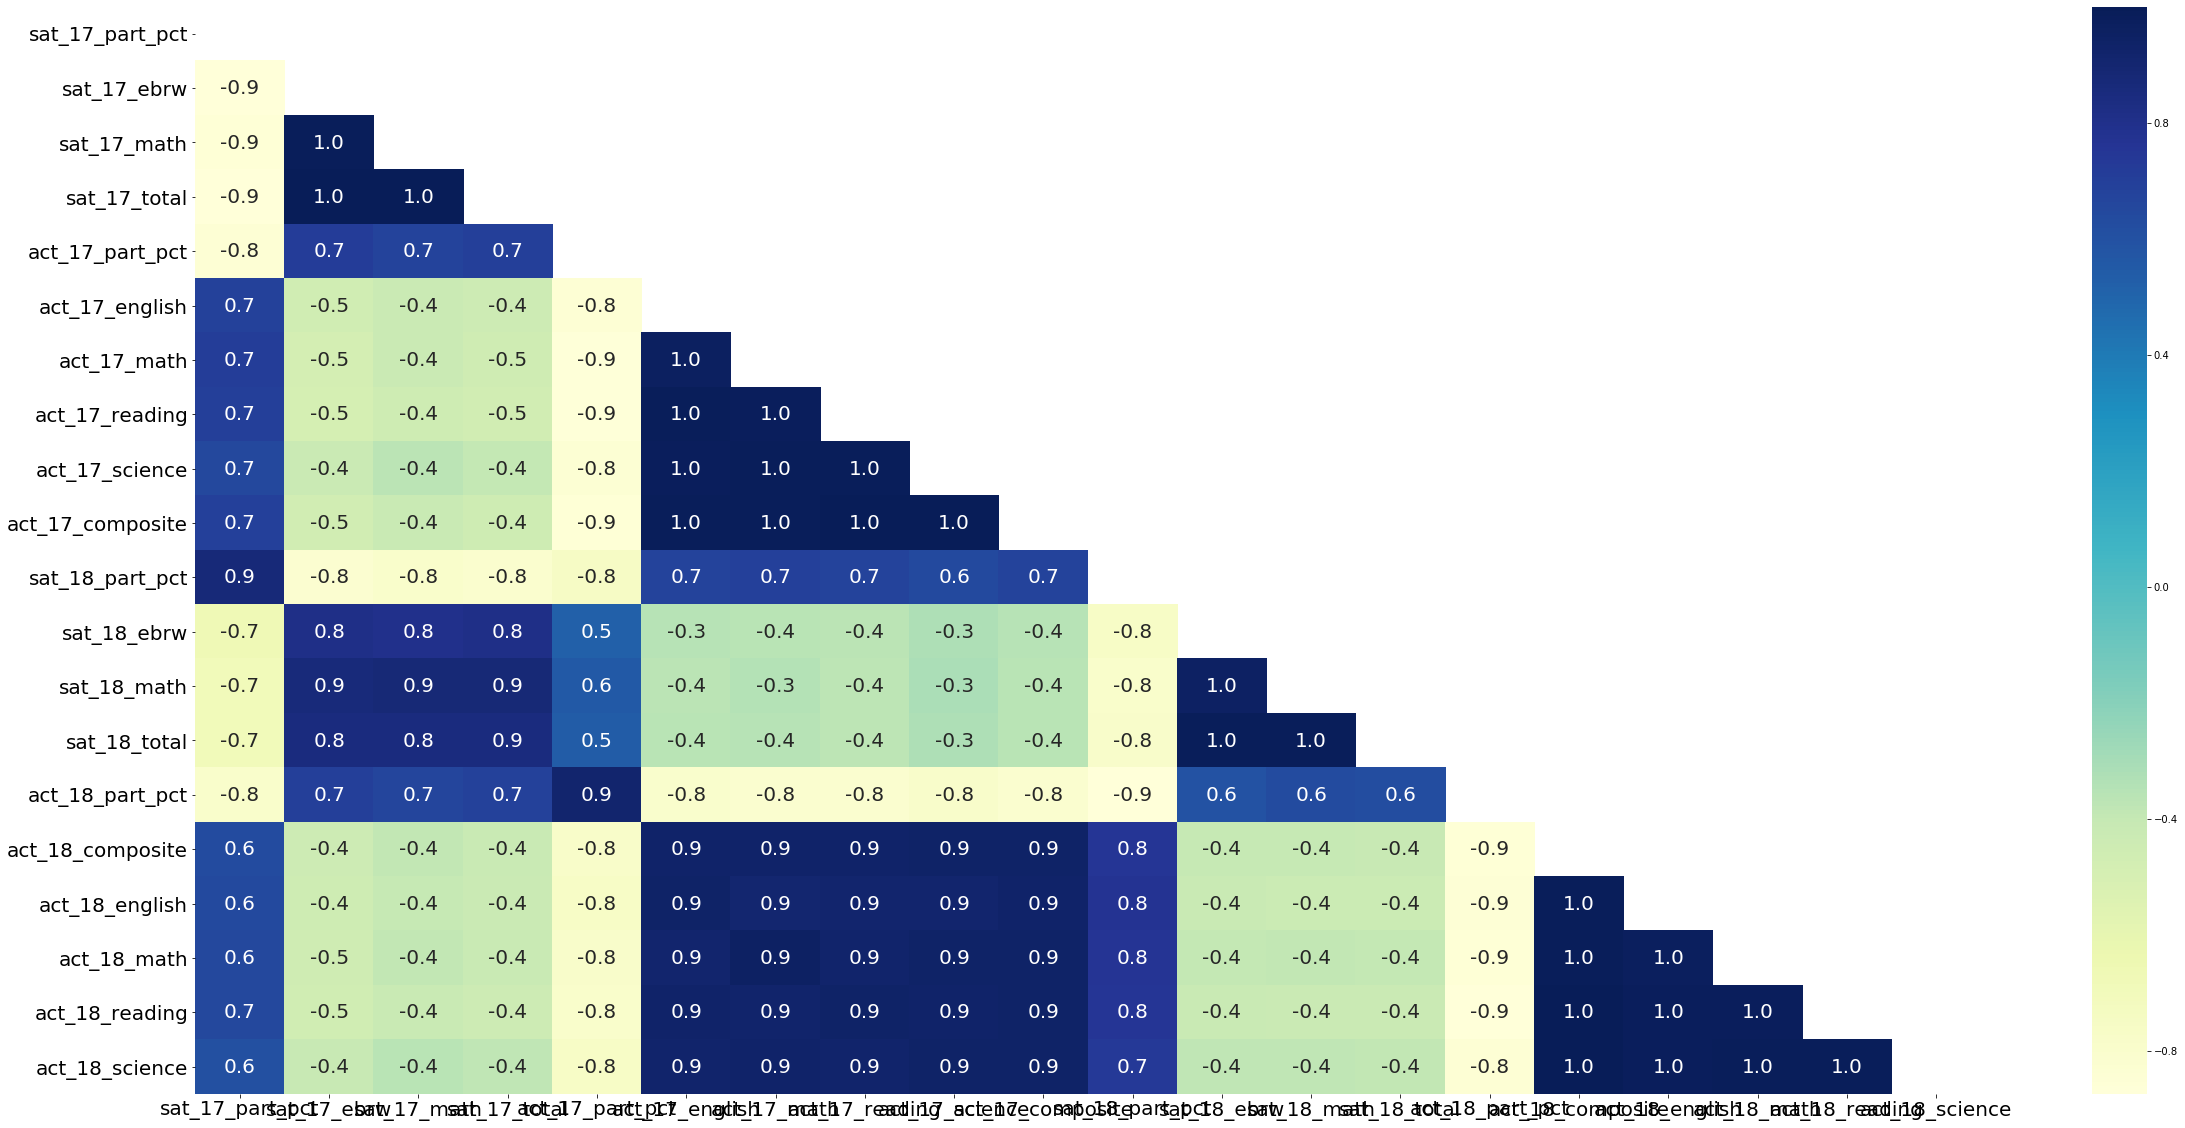

In [124]:
# Amendment
fix, ax = plt.subplots(figsize=(40,20))
mask = np.zeros_like(final.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(final.corr(), mask=mask, cmap='YlGnBu',ax=ax,annot=True,fmt='.1f',annot_kws={"size":20})
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=20)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=20);

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [125]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(16,8),sharex=False,sharey=False) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.distplot(dataframe[column],ax=ax[i],bins=10,kde=False)#,fit=norm)
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel('Frequency')
         
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

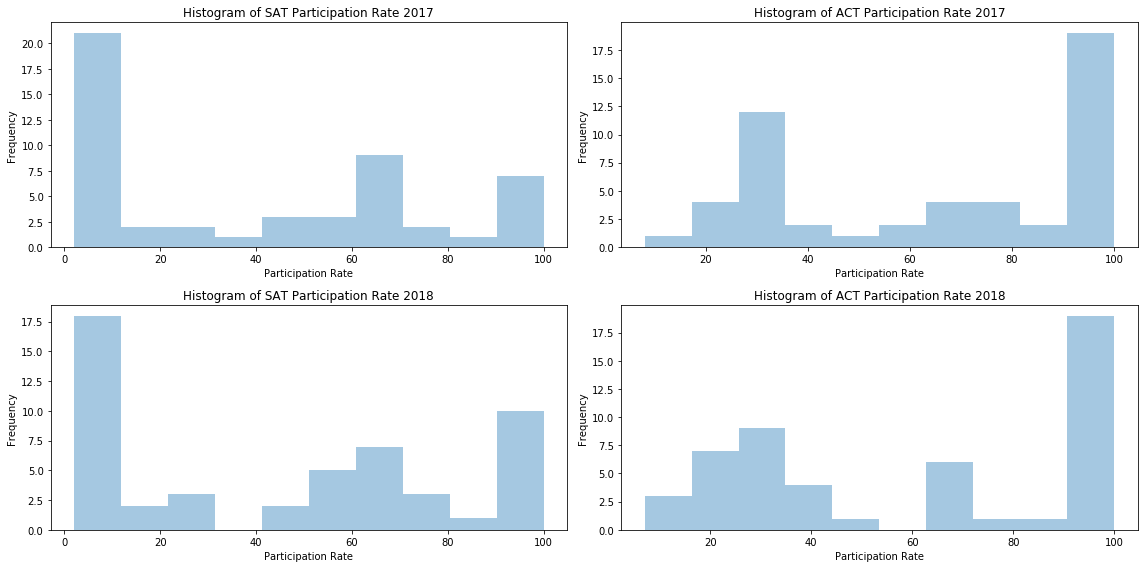

In [126]:

# Subplot_histogram for Participation rates for SAT & ACT
Participation_Rates_Hist=subplot_histograms(final,
                   ['sat_17_part_pct','act_17_part_pct','sat_18_part_pct','act_18_part_pct'],
                   ['Histogram of SAT Participation Rate 2017','Histogram of ACT Participation Rate 2017','Histogram of SAT Participation Rate 2018','Histogram of ACT Participation Rate 2018'],
                   ['Participation Rate','Participation Rate','Participation Rate','Participation Rate'])
plt.tight_layout()

<font color=darkblue> 
All the 4 histograms shape are not symmetric .<br><br>
Based on the histograms above, Participation Rate for SAT Test is lower (with more states having participant rate lower than 10 %). The shape is skewed to the right.There's an increased in SAT participant rate in year 2018, it can be clearly seen that number of states that achieve 40% to 100% participant rate increased<br><br>
On the other hand, Participation Rate for ACT Test is higher (with more states having participant rate 100 %).The shape is skewed to the right<br></font>



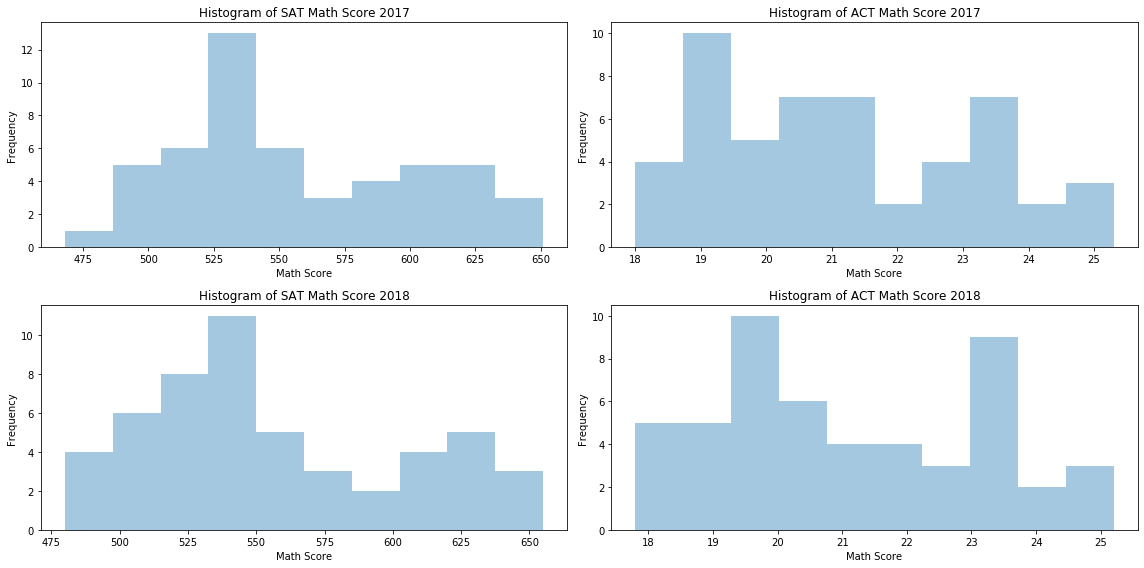

In [127]:
# Subplot_histogram for Math scores for SAT & ACT
Math_Score_Hist= subplot_histograms(final,
                   ['sat_17_math','act_17_math','sat_18_math','act_18_math'],
                   ['Histogram of SAT Math Score 2017','Histogram of ACT Math Score 2017','Histogram of SAT Math Score 2018','Histogram of ACT Math Score 2018'],
                   ['Math Score','Math Score','Math Score','Math Score'])
plt.tight_layout()

<font color=darkblue>
All the 4 histograms shape are not symmetric and skewed to the right.<br><br>
Based on the histograms above, more states have lower Math score for SAT Test (less than 600 score).<br><br>
On the other hand, Math score for ACT Test has bimodal shape, having 2 peaks.<br><br>
 </font>

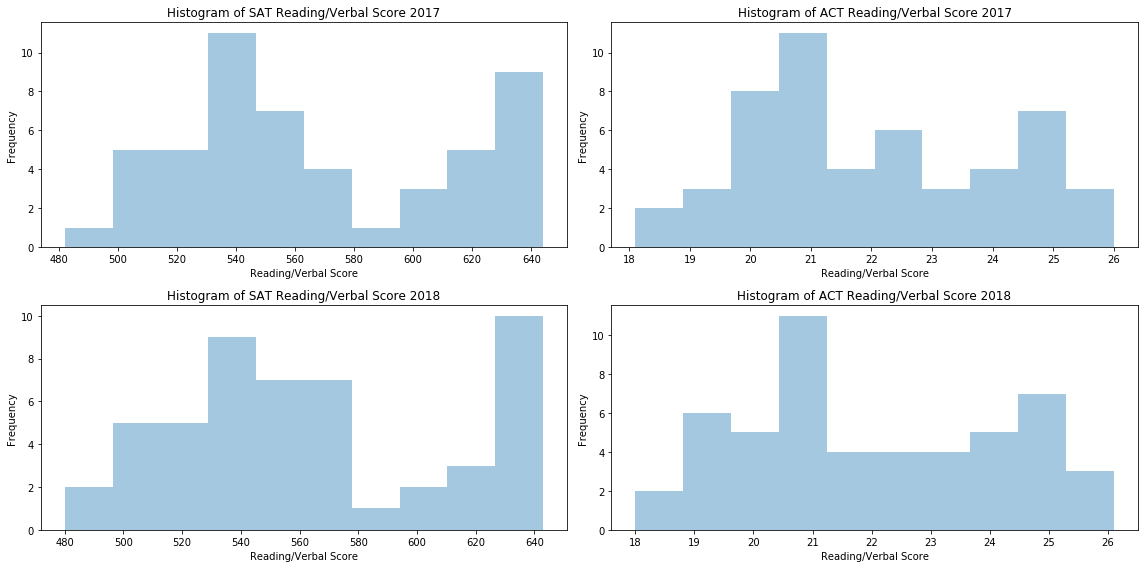

In [128]:
# Subplot_histogram for Reading/verbal scores for SAT & ACT
Read_Verbal_Score_Hist= subplot_histograms(final,
                   ['sat_17_ebrw','act_17_reading','sat_18_ebrw','act_18_reading'],
                   ['Histogram of SAT Reading/Verbal Score 2017','Histogram of ACT Reading/Verbal Score 2017','Histogram of SAT Reading/Verbal Score 2018','Histogram of ACT Reading/Verbal Score 2018'],
                   ['Reading/Verbal Score','Reading/Verbal Score','Reading/Verbal Score','Reading/Verbal Score'])
plt.tight_layout()

<font color=darkblue>
All the 4 histograms shape are not symmetric, having bimodal shape with 2 peaks.<br><br>
Based on the histograms above, more states have lower SAT Reading/ Verbal score  (less than 600 score).
.</font>

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


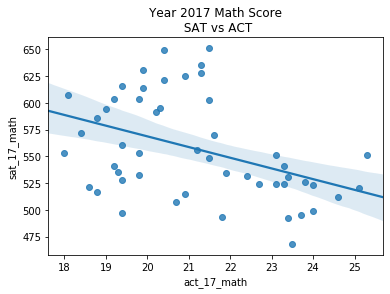

In [129]:
# SAT vs. ACT math scores for 2017
fig_1=sns.regplot(x=final['act_17_math'], y=final['sat_17_math'])
fig_1.set_title('Year 2017 Math Score\n SAT vs ACT');

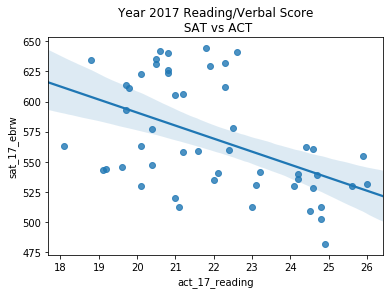

In [130]:
#SAT vs. ACT verbal/reading scores for 2017
fig_2=sns.regplot(x=final['act_17_reading'], y=final['sat_17_ebrw'])
fig_2.set_title('Year 2017 Reading/Verbal Score\n SAT vs ACT');

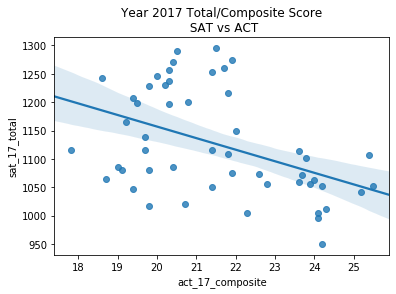

In [131]:
# SAT vs. ACT total/composite scores for 2017
fig_3=sns.regplot(x=final['act_17_composite'], y=final['sat_17_total'])
fig_3.set_title('Year 2017 Total/Composite Score\n SAT vs ACT');

<font color=darkblue> Year 2017 Math Score SAT vs ACT shows a downward sloping trend, suggesting a negative correlation between SAT & ACT 2017 math score. Which means states with high sat score will have low act score and vice versa.It is most probably due to State's mandatory in either test or student is given option to choose to take either SAT or ACT Test
<br><br>
The same explains the scatterplot between:
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017

</font>

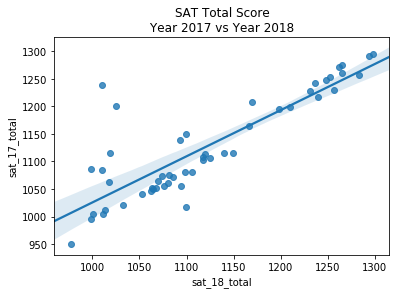

In [132]:
# Total scores for SAT 2017 vs. 2018
fig_5=sns.regplot(x=final['sat_18_total'], y=final['sat_17_total'])
fig_5.set_title('SAT Total Score\n Year 2017 vs Year 2018 ');

<font color=darkblue> Year 2017 vs Year 2018 Total SAT Score shows a generally linear trend.<br> This indicates that respective states total score for year 2017 vs year 2018 does not differ much, except for some points that is far from the linear line.

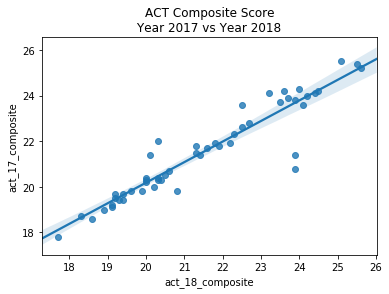

In [133]:
# Composite scores for ACT 2017 vs. 2018
fig_6=sns.regplot(x=final['act_18_composite'], y=final['act_17_composite'])
fig_6.set_title('ACT Composite Score\n Year 2017 vs Year 2018 ');

<font color=darkblue> 
 Year 2017 vs Year 2018 Total ACT Score shows a similar trend</font>

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

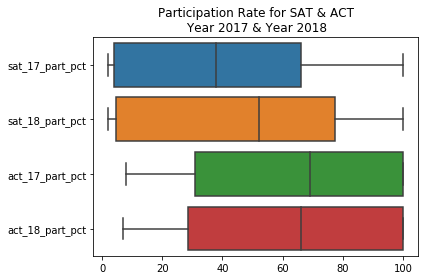

In [135]:
participation_r=final[['sat_17_part_pct','sat_18_part_pct','act_17_part_pct','act_18_part_pct']]
box_plot_participation=sns.boxplot(data=participation_r,orient='h')
box_plot_participation.set_title('Participation Rate for SAT & ACT\n Year 2017 & Year 2018')
plt.tight_layout()

<font color=darkblue> 
SAT Test:<br>
The boxplot shape for SAT Participation Rate is not symmetric, it's skewed left.<br>
For SAT Test Participation rate, the Median in Year 2018 is higher than Year 2017.<br>
There is an increase in Participation Rate for SAT Test from Year 2017 to Year 2018.<br>
    
ACT Test:<br>
The boxplot shape for ACT Participation Rate 2017 is not symmetric, it's skewed left.<br>
The boxplot shape for ACT Participation Rate 2018 is symmetric, length of both sides are about the same.<br>
For ACT Test Participation rate, the Median in Year 2018 is slightly lower than Year 2017.<br>
There is a decrease in Participation Rate for ACT Test from Year 2017 to Year 2018.<br></font>

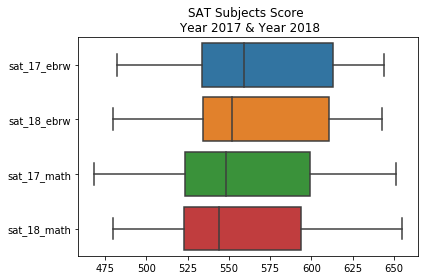

In [136]:
# SAT subjects 2017, 2018
sat_sub_1718=final[['sat_17_ebrw','sat_18_ebrw','sat_17_math','sat_18_math']]
box_plot_sat_sub_1718=sns.boxplot(data=sat_sub_1718,orient='h')
box_plot_sat_sub_1718.set_title('SAT Subjects Score \n Year 2017 & Year 2018')
plt.tight_layout()

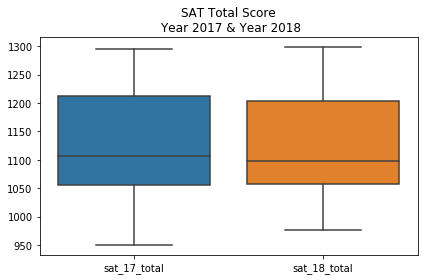

In [137]:
# SAT Total Score 2017, 2018
sat_tol_1718=final[['sat_17_total','sat_18_total']]
box_plot_sat_tol_1718=sns.boxplot(data=sat_tol_1718)
box_plot_sat_tol_1718.set_title('SAT Total Score\n Year 2017 & Year 2018')
plt.tight_layout()


<font color=darkblue> 
SAT Subject Test & Total Score:<br>
The boxplot shape for all SAT subjects score & SAT Total Score is not symmetric, it's skewed right.<br>
Generally, median for both subjects in SAT and SAT Total Score has dropped in Year 2018 compared to Year 2017.<br>
Canditates taking SAT, generally score better in Reading/ Writing subject compared to Math subject.<br></font>

In [ ]:
# ACT subjects 2017, 2018

act_sub_1718=final[['act_17_english','act_18_english','act_17_math','act_18_math','act_17_reading','act_18_reading','act_17_science','act_18_science']]
box_plot_act_sub_1718=sns.boxplot(data=act_sub_1718,orient='h')
box_plot_act_sub_1718.set_title('ACT Subjects Score \n Year 2017 & Year 2018')
plt.tight_layout()


In [ ]:
# ACT Total Score 2017, 2018
act_tol_1718=final[['act_17_composite','act_18_composite']]
box_plot_act_tol_1718=sns.boxplot(data=act_tol_1718)
box_plot_act_tol_1718.set_title('ACT Composite Score\n Year 2017 & Year 2018')


<font color=darkblue> 
ACT Subject Test & Composite Score:<br>
The boxplot shape for all ACT subjects score & ACT Composite Score is not symmetric, it's skewed right.<br>
Generally, median for all subjects in ACT and ACT Composite Score has dropped in Year 2018 compared to Year 2017.<br>
Canditates taking ACT, generally score better in English & Reading subject compared to Math & Science subject.<br></font>

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [139]:
# participation rate statistics
participation_r.describe()

,sat_17_part_pct,sat_18_part_pct,act_17_part_pct,act_18_part_pct
count,51.000000,51.000000,51.000000,51.000000
mean,39.803922,45.745098,65.254902,61.647059
std,35.276632,37.314256,32.140842,34.080976
min,2.000000,2.000000,8.000000,7.000000
25%,4.000000,4.500000,31.000000,28.500000
50%,38.000000,52.000000,69.000000,66.000000
75%,66.000000,77.500000,100.000000,100.000000
max,100.000000,100.000000,100.000000,100.000000


<font color=darkblue> 
Central tendency (mean,median) for SAT has shifted significantly from year 2017 to year 2018 (mean from 39.80 to 45.74 and median from 38 to 52)<br>
    
On the other hand, central tendency for ACT does not has drastic change fro year 2017 to year 2018 (mean from 65.25 to 61.64 and median from 69 to 66) </font>


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: 
<font color=darkblue> Based on the histograms above, the data does not follow normal distribution.</font>

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: <font color=darkblue> 
Based on the histograms above, the data does not follow normal distribution.</font>

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:<font color=darkblue>. We cannot condict statistcal inference test as we do not have idea of the sample size from each state as the data gathered are in aggredated form.</font>

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:<font color=darkblue>. No. The score scale range for both test are different.Both Math score will only be comparable if either one test scoring has been converted to another test' score using a specfic factor.</font>

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

 <font color=darkblue>States Choosen:<br>
 1.Colorado:<br>
 There's a switch trend in test taken for state Colorado observed.(from ACT to SAT)<br><br>
 2. Illinois:<br>
 There's a switch trend in test taken for state Illinois observed.(from ACT to SAT)<br><br>
 3. Ohio:<br>
 There is a big increase for ACT Participation Rate from 75% to 100%, but only a small increase in SAT </font>




## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

 <font color=darkblue>
We would recommend to increase participation in SAT by mandating the completion of the SAT for all high school students. <br>
This can be done by:<br>
- Covering all of part of the exam fees (USD 113.50)<br>
- Offering the SAT during regular school hours to make student participation as convenient as possible<br>
- Make SAT as mandatory requirement for college admission<br>
- Offering free test preparation program. eg have access to the Official SAT,Online Course, Khan Academy’s free online practice problems and instructional videos.<br>
- Provide additional academic support for students who may need it</font>
